# Exemple d'utilisation de données océanographiques

Pour plus de contexte voir: [README](https://github.com/OGSL-SLGO/examples/blob/main/examples/ctd-time-series/)

## Partie 2: Affichage de la température pour une des sites


Nous allons afficher l'évolution de la température pour le site SJR_Evandale

Récupérons les données de se site à la profondeur 20m sur toute l'étendue temporelle

In [1]:
import pandas as pd

data_url_site = "https://erddap.ogsl.ca/erddap/tabledap/mpoMaritimeStJohnCTD.csv?site_name%2Ctime%2Csea_water_temperature&site_name=%22SJR_Evandale%22&depth=20.0&orderBy(%22time%22)"

dataframe_site = pd.read_csv(data_url_site, header=[0,1])
dataframe_site.head()

,site_name,time,sea_water_temperature
,Unnamed: 0_level_1,UTC,degree_C
0,SJR_Evandale,2019-07-24T14:36:00Z,23.402466
1,SJR_Evandale,2019-07-24T14:37:00Z,23.396790
2,SJR_Evandale,2019-07-24T14:38:00Z,23.399720
3,SJR_Evandale,2019-07-24T14:39:00Z,23.397125
4,SJR_Evandale,2019-07-24T14:40:00Z,23.400116


Ces données contiennent deux lignes d'en-têtes (nom de variables et unités). Pour faciliter, l'utilisation de plotly nous allons en supprimer une (celle des unités)

In [3]:
dataframe_site.columns = dataframe_site.columns.droplevel(-1)

La granularité temporelle étant très fine nous allons calculer par journées une valeur min, max, et moyenne de la température.

In [4]:
dataframe_site['time'] = pd.to_datetime(dataframe_site['time'])

daily_aggregations = dataframe_site.groupby(pd.Grouper(key="time", freq='1D'))["sea_water_temperature"].agg(['min', 'max', 'mean'])

daily_aggregations.head()

,min,max,mean
time,,,
2019-07-24 00:00:00+00:00,23.275300,23.449432,23.356635
2019-07-25 00:00:00+00:00,23.358551,23.800049,23.512278
2019-07-26 00:00:00+00:00,23.469910,23.768158,23.639875
2019-07-27 00:00:00+00:00,23.633636,23.901093,23.762446
2019-07-28 00:00:00+00:00,23.676666,23.973877,23.862269


Affichons ces trois données sur un même graphique

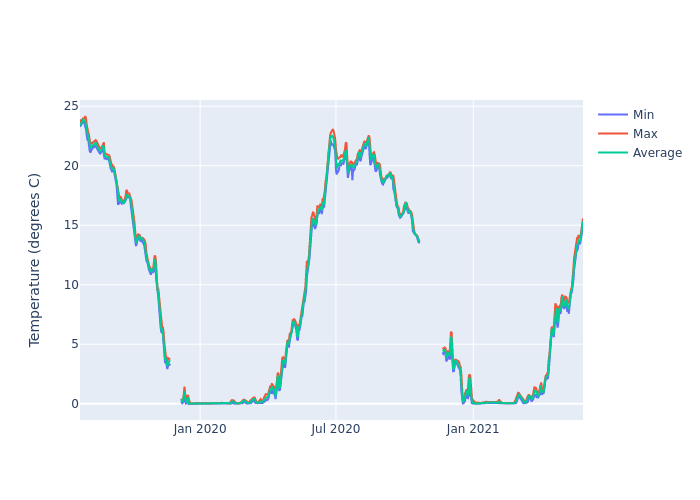

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Min', x=daily_aggregations.index, y=daily_aggregations["min"]),
    go.Scatter(name='Max', x=daily_aggregations.index, y=daily_aggregations["max"]),
    go.Scatter(name='Average', x=daily_aggregations.index, y=daily_aggregations["mean"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_yaxes(title_text = "Temperature (degrees C)")

# remove "png" to display an interactive graph
fig.show("png")